# **Stat441 Final Project**

*Yushan Chen   2021-12-10*

This is the code for Stat441 final project of weed/crop detection.

The replicated paper is [Crop and Weeds Classification for Precision Agriculture using Context-Independent Pixel-Wise Segmentation](https://ieeexplore-ieee-org.proxy.lib.uwaterloo.ca/stamp/stamp.jsp?tp=&arnumber=8675654)

# Section 1: Segmentation process

In this section, the goal is to use the original RGB images to generate a robust pixel-wise binary segmentation mask that removes the background (i.e., the soil). 

We used a modified version of VGG16 Unet. The input should be 512 x 512 3-channel images, and the output would be a 512 x 512 grayscale (1-channel) image.

The sunflower dataset is used for training and testing. After splitting, 400 images are used for training and 100 for validation. The rgb images are resized to fit the model input size, and the label masks are converted to black or white only, and taken to be the segmentation masks.

The final model has a Mean IoU of 0.90020716, and a validation accuracy of 0.9927. The validation accuracy is quite stable after the 35th epoch.

In [ ]:
# Load required packages
from tensorflow.keras.utils import normalize
import os
import cv2
import keras
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import glob

In [ ]:
# Read in dataset
from google.colab import drive
drive.mount('/content/gdrive')

#!unzip /content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/zip/gt_color.zip
#!unzip /content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/zip/rgb.zip

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# directories
image_directory = '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb/'
mask_directory = '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color/'

In [ ]:
image_names = glob.glob('/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb/*.png')
print(image_names)

['/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb/jesi_05_12__0_4min_rid_frame104.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb/jesi_05_12__0_4min_rid_frame101.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb/jesi_05_12__0_4min_rid_frame112.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb/jesi_05_12__0_4min_rid_frame128.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb/jesi_05_12__0_4min_rid_frame122.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb/jesi_05_12__0_4min_rid_frame134.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb/jesi_05_12__0_4min_rid_frame124.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb/jesi_05_12__0_4min_rid_frame133.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb/jesi_05_12__0_4min_r

In [ ]:
# resize the images
import os
from PIL import Image
new_width = 512
new_height = 512
rgb_resized_path = '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/'
# The following codes are commented out because they should only be run once.
#for img_name in image_names:
#  file_name = os.path.basename(img_name)
#  img = Image.open(img_name) 
#  img = img.resize((new_width, new_height), Image.ANTIALIAS)
#  to_save_path = rgb_resized_path+file_name
#  img.save(to_save_path)

In [ ]:
# get the resized image names
image_names = glob.glob('/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/*.png')
print(image_names)

['/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame104.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame101.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame112.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame128.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame122.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame134.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame124.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame133.png',

In [ ]:
# sort image names
image_names.sort()
print(image_names)

['/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame101.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame104.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame105.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame112.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame121.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame122.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame124.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/rgb_resized_512/jesi_05_12__0_4min_rid_frame125.png',

In [ ]:
# form image dataset
images = [cv2.imread(img) for img in image_names]
image_dataset = np.array(images)
#image_dataset = np.expand_dims(image_dataset, axis = 3)

In [ ]:
# read the masks the same way
mask_names = glob.glob('/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color/*.png')

In [ ]:
# resize the images
gt_color_resized_path = '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512/'
# The following codes are commented out because they should only be run once.
#for img_name in mask_names:
#  file_name = os.path.basename(img_name)
#  img = Image.open(img_name) 
#  img = img.resize((new_width, new_height), Image.ANTIALIAS)
#  to_save_path = gt_color_resized_path+file_name
#  img.save(to_save_path)

In [ ]:
mask_names = glob.glob('/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512/*.png')
print(mask_names)

['/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512/jesi_05_12__0_4min_rid_frame128.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512/jesi_05_12__0_4min_rid_frame169.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512/jesi_05_12__0_4min_rid_frame142.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512/jesi_05_12__0_4min_rid_frame105.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512/jesi_05_12__0_4min_rid_frame134.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512/jesi_05_12__0_4min_rid_frame129.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512/jesi_05_12__0_4min_rid_frame112.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_5

In [ ]:
# change segmentation to black and white
from PIL import Image
gt_color_resized_bw_path = '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512_bw/'
# The following codes are commented out because they should only be run once.
#for img_name in mask_names:
#  file_name = os.path.basename(img_name)
#  img = Image.open(img_name)
#  thresh = 30
#  fn = lambda x : 255 if x > thresh else 0
#  img = img.convert('L').point(fn, mode='1')
#  to_save_path = gt_color_resized_bw_path+file_name
#  img.save(to_save_path)

In [ ]:
mask_names = glob.glob('/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512_bw/*.png')
print(mask_names)

['/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512_bw/jesi_05_12__0_4min_rid_frame128.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512_bw/jesi_05_12__0_4min_rid_frame169.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512_bw/jesi_05_12__0_4min_rid_frame142.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512_bw/jesi_05_12__0_4min_rid_frame105.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512_bw/jesi_05_12__0_4min_rid_frame134.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512_bw/jesi_05_12__0_4min_rid_frame129.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_all/gt_color_resized_512_bw/jesi_05_12__0_4min_rid_frame112.png', '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/jesi_a

In [ ]:
# form the mask dataset
mask_names.sort()
masks = [cv2.imread(mask,0) for mask in mask_names]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
# 0 is black, 255 is white
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (500, 512, 512, 3)
Mask data shape is:  (500, 512, 512, 1)
Max pixel value in image is:  255
Labels in the mask are :  [  0 255]


In [ ]:
# normalize images
image_dataset=image_dataset/255.
mask_dataset=mask_dataset/255.

In [ ]:
# Split training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.2, random_state = 42)

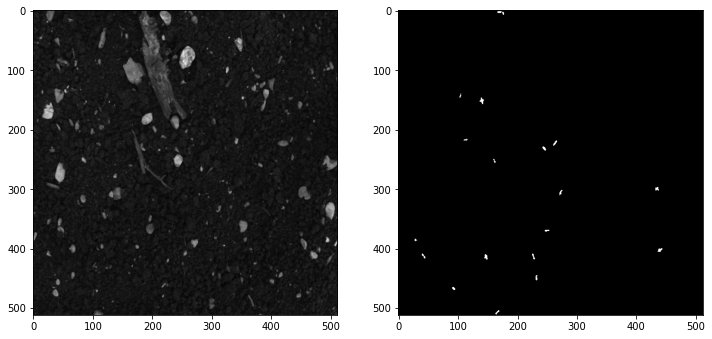

In [ ]:
# Sanity check, view few mages
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [ ]:
# model 1 (modified VGG16 - Unet)
# Building Unet by dividing encoder and decoder into blocks 
# Use VGG16 as encoder

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.layers import Activation, MaxPool2D, Concatenate
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling (aborted)


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

##############################################################
    """ Pre-trained VGG16 Model """
    vgg16 = VGG16(include_top=False, weights=None, input_tensor=inputs)
############# might want to delete this line
    vgg16.trainable = False
    """ Encoder """
    s1 = vgg16.get_layer("block1_conv2").output         ## (512 x 512)
    s2 = vgg16.get_layer("block2_conv2").output         ## (256 x 256)
    s3 = vgg16.get_layer("block3_conv3").output         ## (128 x 128)
    s4 = vgg16.get_layer("block4_conv3").output         ## (64 x 64)
##############################################################

#    s1, p1 = encoder_block(inputs, 64)
#    s2, p2 = encoder_block(p1, 128)
#    s3, p3 = encoder_block(p2, 256)
#    s4, p4 = encoder_block(p3, 512)

    b1 = vgg16.get_layer("block5_conv3").output #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model
if __name__ == "__main__":
    input_shape = (512, 512, 3)
    model = build_unet(input_shape, n_classes=1)
    model.summary()

sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 512, 512, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 512, 512, 64  36928       ['block1_conv1[0][0]']           
                                )                                                     

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [ ]:
input_shape

(512, 512, 3)

In [ ]:
# compile the model
import tensorflow.keras as K
model = build_unet(input_shape, n_classes=1
                         )
model.compile(optimizer=K.optimizers.Adam(learning_rate = 1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 512, 512, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 512, 512, 64  36928       ['block1_conv1[0][0]']           
                                )                                                     

In [ ]:
# add a check point to save the model with the highest validation accuracy
check_point=K.callbacks.ModelCheckpoint(filepath='/content/gdrive/MyDrive/Stat441_Final_Project/test_model_2_autosave3.hdf5',
                                        monitor='val_accuracy',
                                        mode='max',
                                        save_best_only=True)

In [ ]:
# fit the model with funflower data
history = model.fit(X_train, y_train, 
                    batch_size = 8, 
                    verbose=1, 
                    epochs=50, 
                    validation_data=(X_test, y_test), 
                    shuffle=True,
                    callbacks=[check_point])

Epoch 1/50
50/50 [==============================] - 37s 747ms/step - loss: 0.3744 - accuracy: 0.9542 - val_loss: 0.6180 - val_accuracy: 0.9598
Epoch 2/50
50/50 [==============================] - 37s 749ms/step - loss: 0.3221 - accuracy: 0.9591 - val_loss: 0.5203 - val_accuracy: 0.9621
Epoch 3/50
50/50 [==============================] - 37s 745ms/step - loss: 0.2827 - accuracy: 0.9675 - val_loss: 0.4128 - val_accuracy: 0.9642
Epoch 4/50
50/50 [==============================] - 37s 745ms/step - loss: 0.2613 - accuracy: 0.9695 - val_loss: 0.3377 - val_accuracy: 0.9649
Epoch 5/50
50/50 [==============================] - 37s 748ms/step - loss: 0.2393 - accuracy: 0.9712 - val_loss: 0.3119 - val_accuracy: 0.9666
Epoch 6/50
50/50 [==============================] - 37s 752ms/step - loss: 0.2150 - accuracy: 0.9708 - val_loss: 0.3136 - val_accuracy: 0.9677
Epoch 7/50
50/50 [==============================] - 37s 743ms/step - loss: 0.1845 - accuracy: 0.9777 - val_loss: 0.2579 - val_accuracy: 0.9683

In [ ]:
model.save('/content/gdrive/MyDrive/Stat441_Final_Project/test_model_2_autosave4.hdf5')

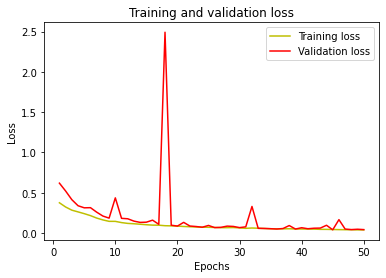

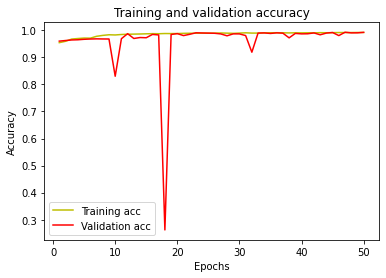

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model("/content/gdrive/MyDrive/Stat441_Final_Project/test_model_2_autosave3.hdf5", compile=False)

In [ ]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

In [ ]:
from tensorflow.keras.metrics import MeanIoU

In [ ]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.90020716


(1, 512, 512, 3)
(512, 512)


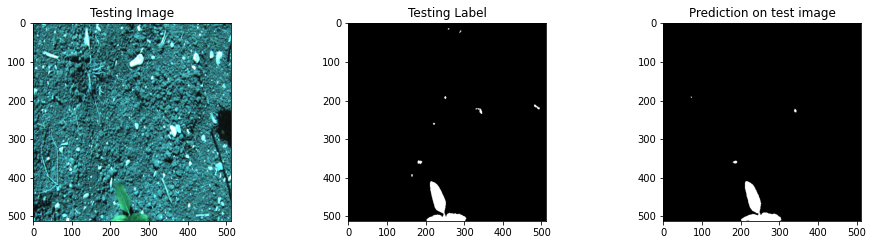

In [ ]:
# show the predictions as images and compare with ground truth
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[[test_img_number]]
ground_truth=y_test[test_img_number]
#test_img_input=np.expand_dims(test_img, 0)
test_img_input=np.array(test_img)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
#plt.imshow(test_img[:,:,0], cmap='gray')
plt.imshow(test_img[0])
plt.subplot(232)
plt.title('Testing Label')
#plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
#plt.imshow(prediction)

plt.show()

In [ ]:
# save the predicted binary segmentation masks as images
file_paths = image_names
path_to_save = '/content/gdrive/MyDrive/Stat441_Final_Project/Sunflower_data/pred_output_512/'
y_pred_sunflower = model.predict(image_dataset)
y_pred_sumflower_thresholded = y_pred_sunflower > 0.5
for i in range(len(file_paths)):
  img_name_to_save = os.path.basename(file_paths[i])
  img_path_to_save = path_to_save+img_name_to_save
  pred_value_0 = y_pred_sumflower_thresholded[i]
  pred_value_1 = (pred_value_0[:,:,0] > 0.5).astype(np.uint8)
  pred_value = pred_value_1*255
  cv2.imwrite(img_path_to_save,pred_value)
